<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
import numpy as np
import pandas as pd 

In [1]:
from tensorflow.keras.datasets import reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
# Demo of encoding
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [5]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

batch_size = 10
maxlen = 100

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding 

# TODO - your code!
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape) 

(8982, 100)
(2246, 100)
(8982,)
(2246,)


In [4]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.02, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# compile and fit
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=10,
          validation_data =(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/10
899/899 [==============================] - 357s 397ms/step - loss: -537.1619 - accuracy: 0.0499 - val_loss: -961.8227 - val_accuracy: 0.0396
Epoch 2/10
899/899 [==============================] - 358s 398ms/step - loss: -1399.3369 - accuracy: 0.0499 - val_loss: -1798.3480 - val_accuracy: 0.0396
Epoch 3/10
899/899 [==============================] - 350s 389ms/step - loss: -2245.9382 - accuracy: 0.0499 - val_loss: -2636.6917 - val_accuracy: 0.0396
Epoch 4/10
899/899 [==============================] - 334s 372ms/step - loss: -3093.1460 - accuracy: 0.0499 - val_loss: -3472.2488 - val_accuracy: 0.0396
Epoch 5/10
899/899 [==============================] - 333s 370ms/step - loss: -3942.2107 - accuracy: 0.0499 - val_loss: -4309.1255 - val_accuracy: 0.0396
Epoch 6/10
899/899 [==============================] - 333s 371ms/step - loss: -4787.5171 - accuracy: 0.0499 - val_loss: -5142.6621 - val_accuracy: 0.0396
Epoch 7/10
899/899 [==============================] - 333s 370ms/step - loss: 

In [0]:
# Test score: -8488.701171875
# Test accuracy: 0.03962600231170654

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

pad_sequences ensures that all the sequences in a list have the same length. I specifically use the maxlen features to specify the maximum length of each sequence. This will cut off/truncate all sequences longer than maxlen.


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Long Short-Term Memory (LSTM) networks are a subtype of recurrent neural networks that are capable of learning order dependence in sequence prediction problems. LSTM's are unique because they are able to overcome the problems that RNN's typically face. Specifically, LTSM's are able to solve the vanishing or exploding gradients problem which occurs during backpropagation during the training process. 

In an LTSM the recurrent weight matrix used in many RNNs is replaced by the identity function which has a derivative on 1 and acts as a constant thus eliminated the vanishing gradients and improving the training process. 

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

RNN's are good for timeseries predictions or where order dependence is important. 
Some standard use cases for LSTMS or RNNS include 
* Text data - Grammarly's algorithm or Google's autofill analyzses previous text so that it can help predict what might come next. 

* Speech data - Because RNN's take previous inputs on a sequencial nature the model can make more accurate outputs. For example, complete the following sentence without reading it: "I went to the store for eggs and ...". A RNN would read the sentence and use it in the prediction rather than another model that might just randomly select a word based on some pretrained algorithm/bias. 
a RNN is also useful for problems regarding: 

* Classification prediction 
* Regression prediction
* Generative models

This is because all of these models rely on time-series dependent data where knowing and analyzing the previous/most recent inputs before producing an output is valuable and enhances the prediction. 

Conversley we would not want to use an RNN for image data or forecasting problems. 


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

In [0]:
import skimage

In [0]:
from skimage.io import imread_collection

image = imread_collection('./frog_images/*.jpg')

In [25]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [0]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

In [0]:
frog = ['bullfrog', 'tree_frog', 'tailed_frog']

In [0]:
def img_contains_frog(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50V2(weights='imagenet')
  features = model.predict(x) 
  result = decode_predictions(features, top=3)[0]
  print(result)
  for entry in result:
    if entry[1] in frog: #"tree_frog" or entry[1] =='bullfrog' or entry[1] == 'frog':
      return ("it's a frog", entry[2])
    elif entry[1] == 'quilt':
      return ("it's a quilt", entry[2])
    else:
      return ("not a frog", 0.0)

In [0]:
from IPython.display import Image

[('n03991062', 'pot', 0.43382013), ('n04522168', 'vase', 0.1851965), ('n07745940', 'strawberry', 0.084334955)]
('not a frog', 0.0)


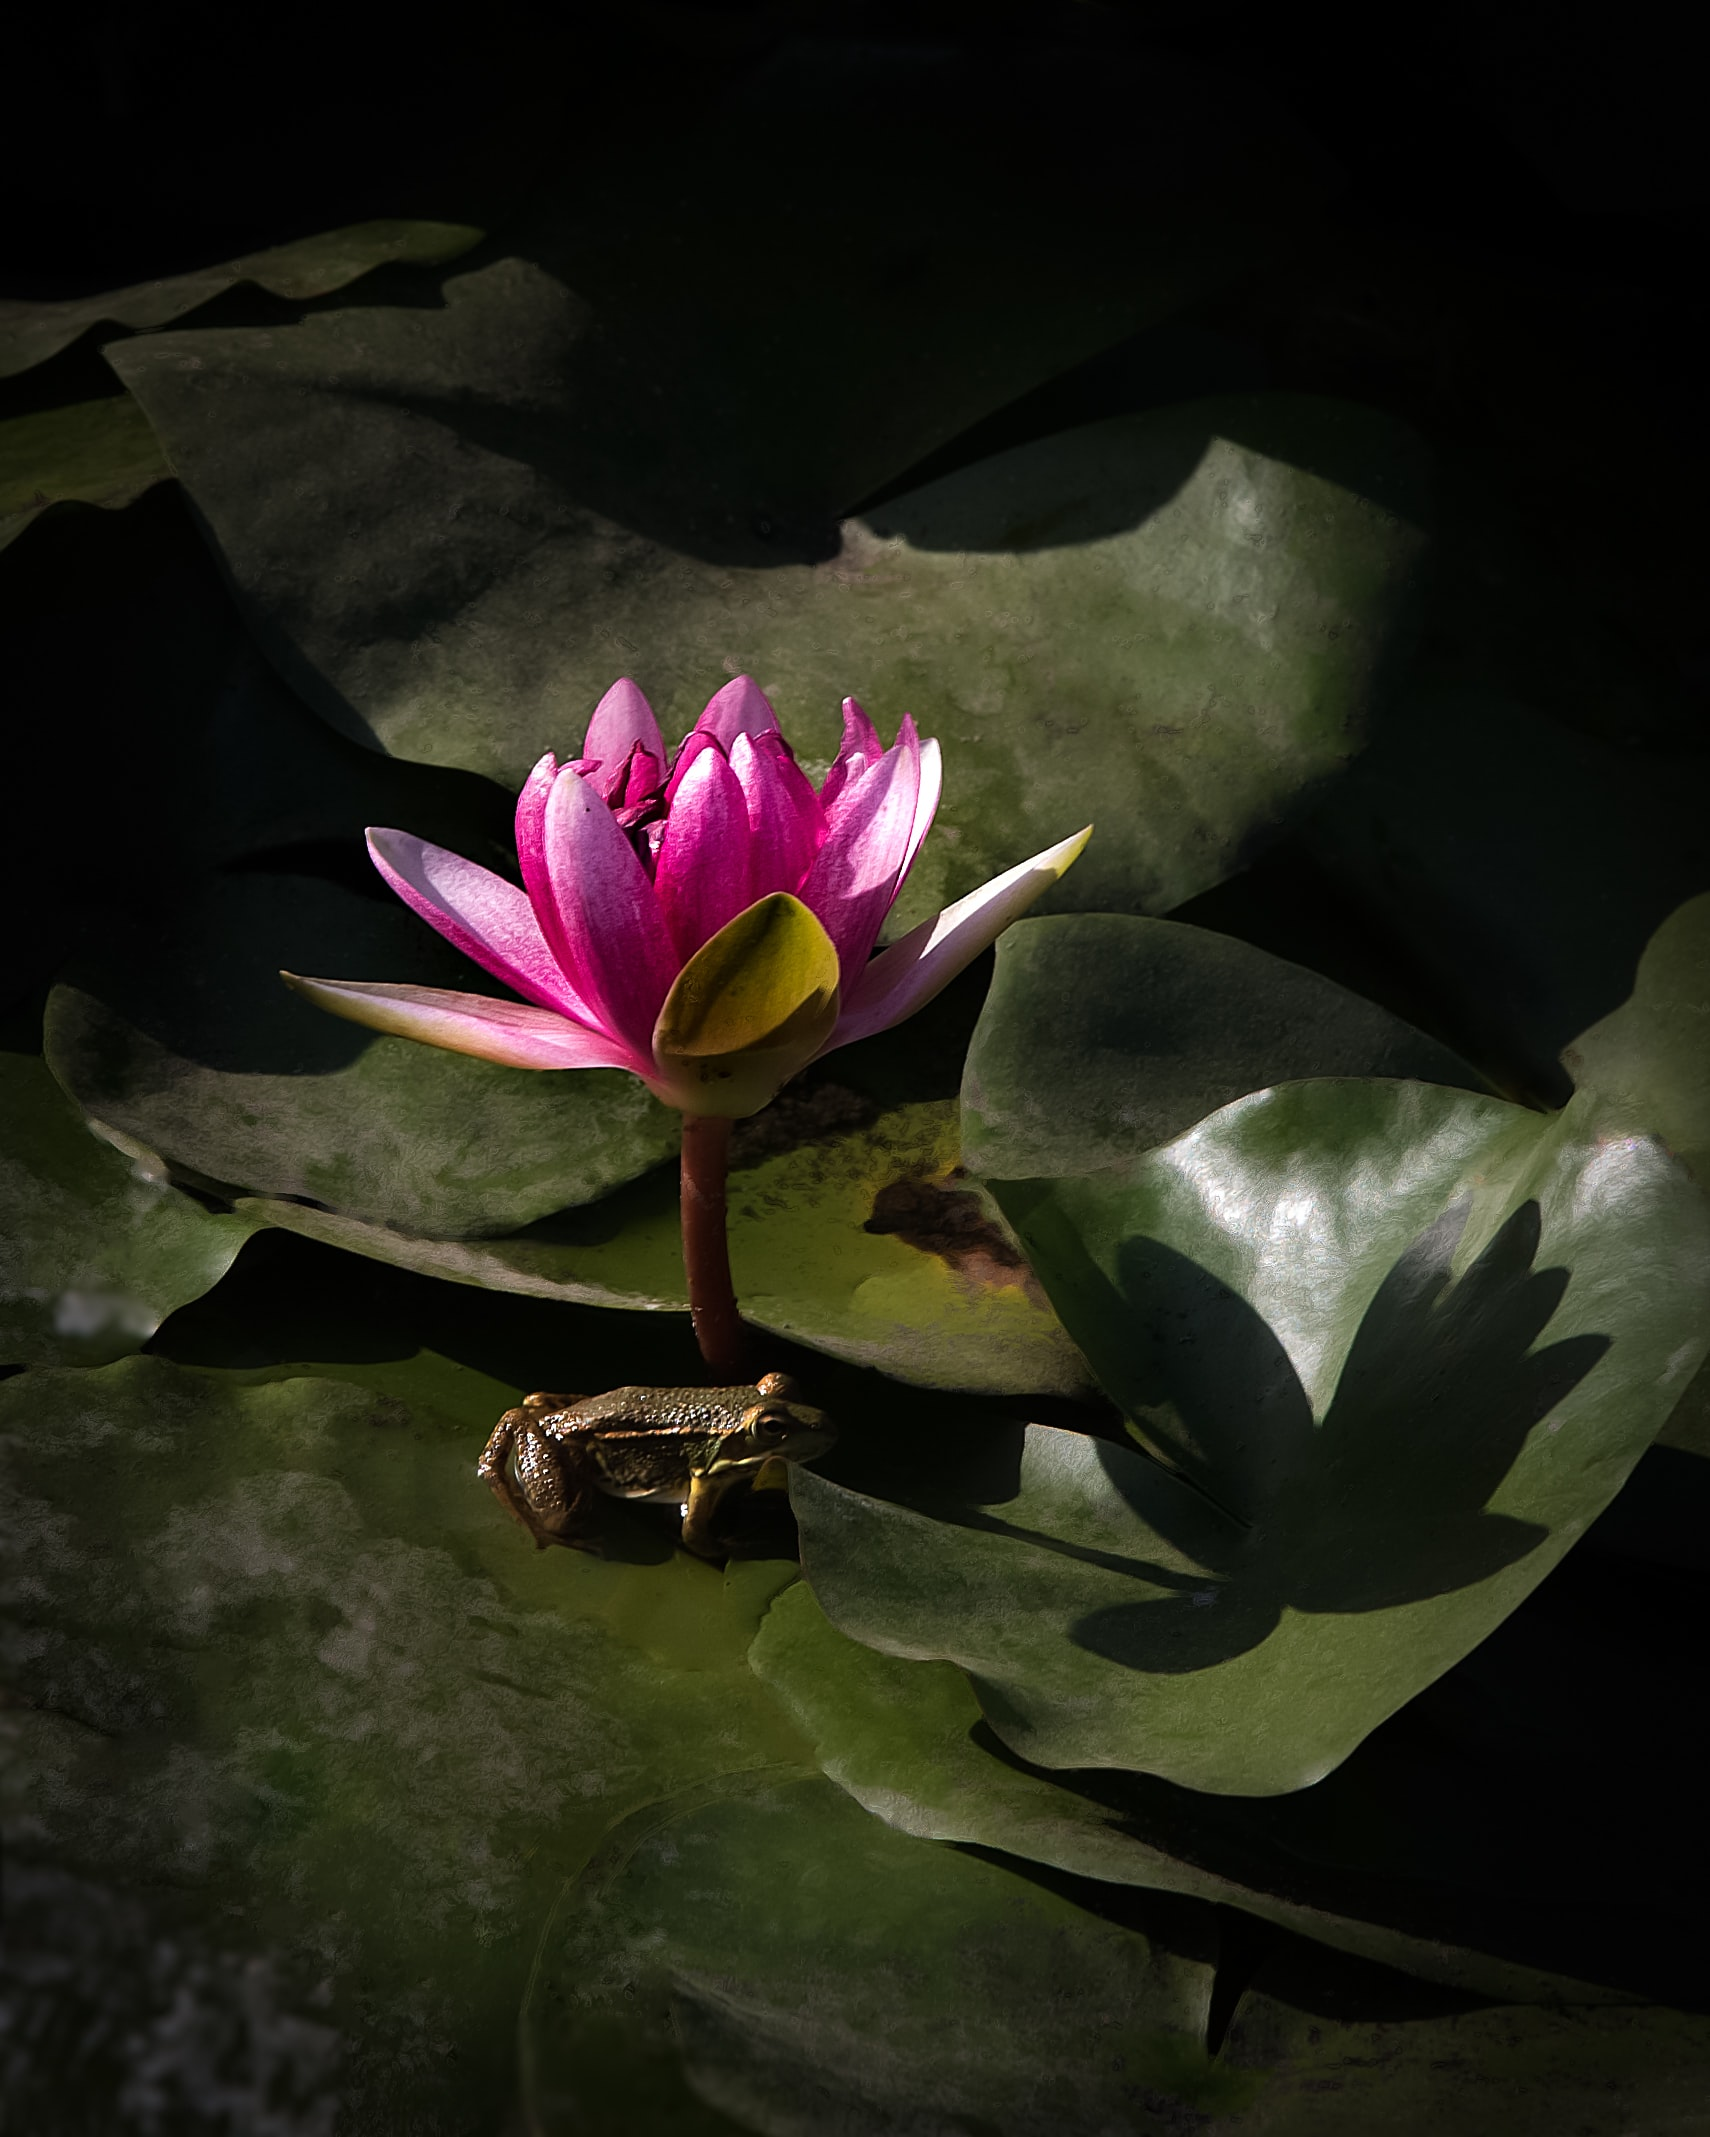

In [94]:
# should be not be frog
print(img_contains_frog(process_img_path('/content/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg')))
Image(filename='/content/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg', width=244)

[('n01644373', 'tree_frog', 0.9961675), ('n01693334', 'green_lizard', 0.002010379), ('n01644900', 'tailed_frog', 0.0013048019)]


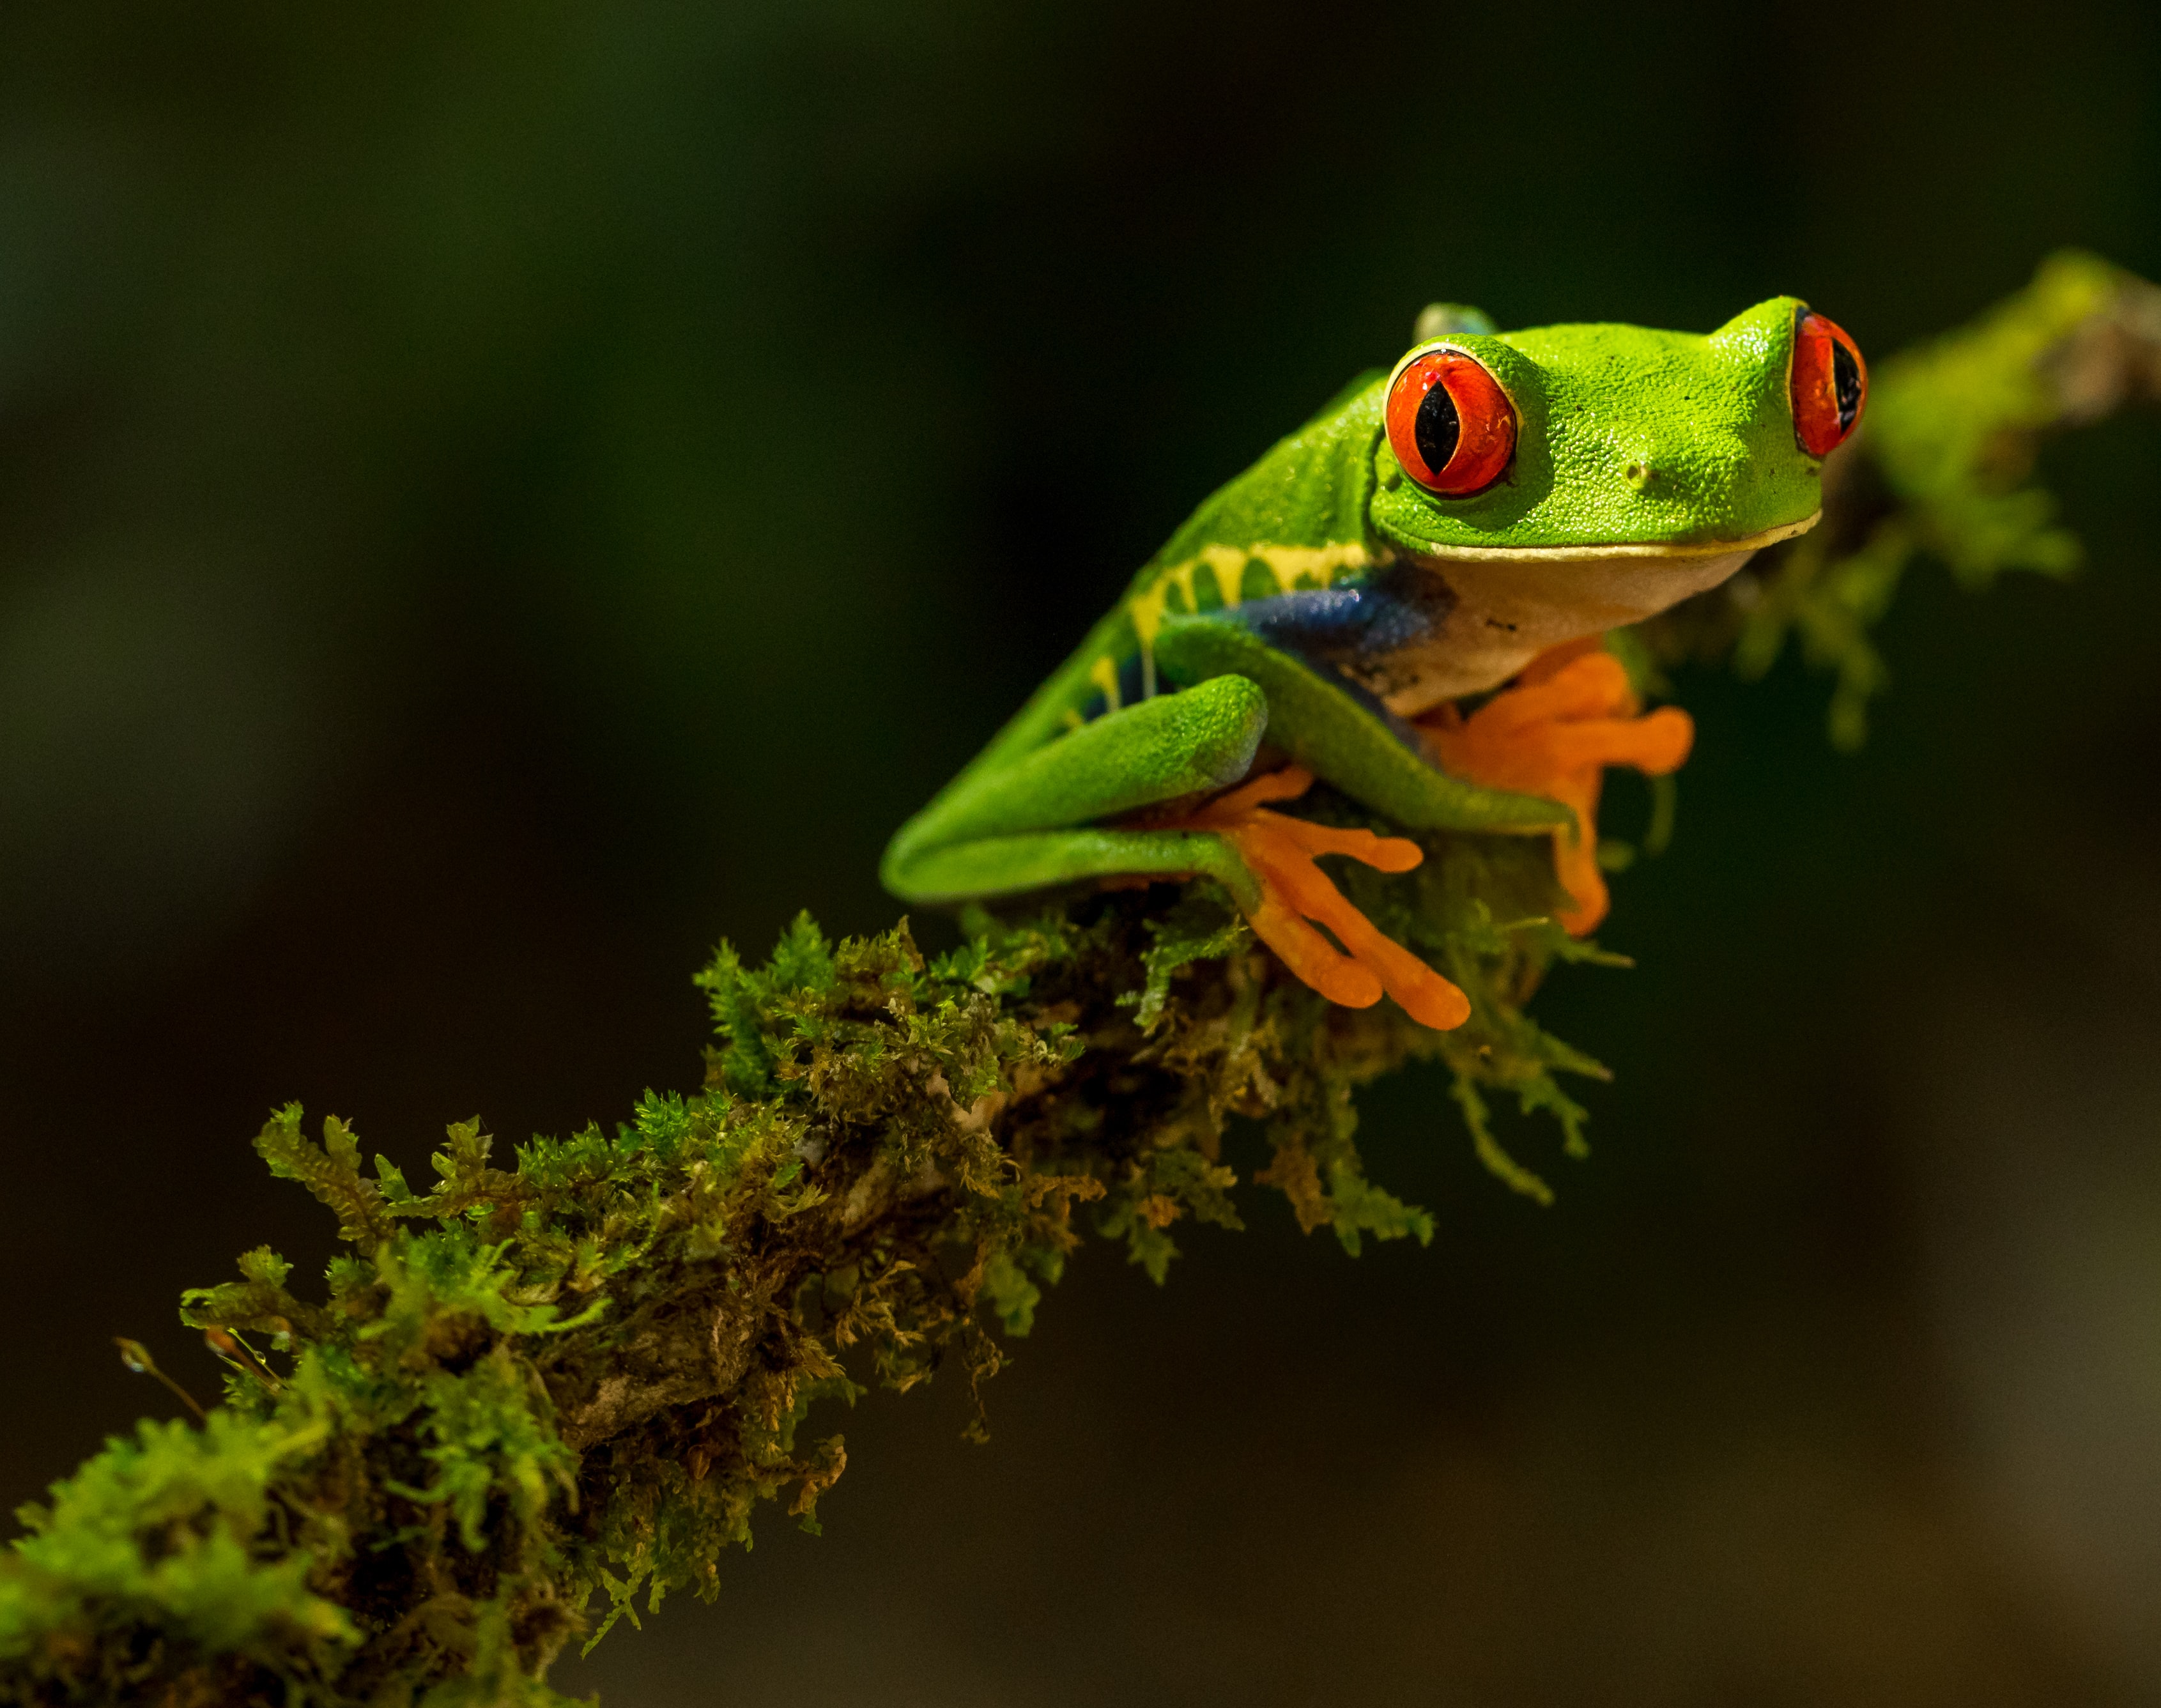

In [102]:
# should be frog
img_contains_frog(process_img_path('/content/frog_images/zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg'))
Image(filename='/content/frog_images/zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg', width=244)

[('n04033995', 'quilt', 0.27399573), ('n11939491', 'daisy', 0.17837097), ('n04209239', 'shower_curtain', 0.071577415)]
("it's a quilt", 0.27399573)


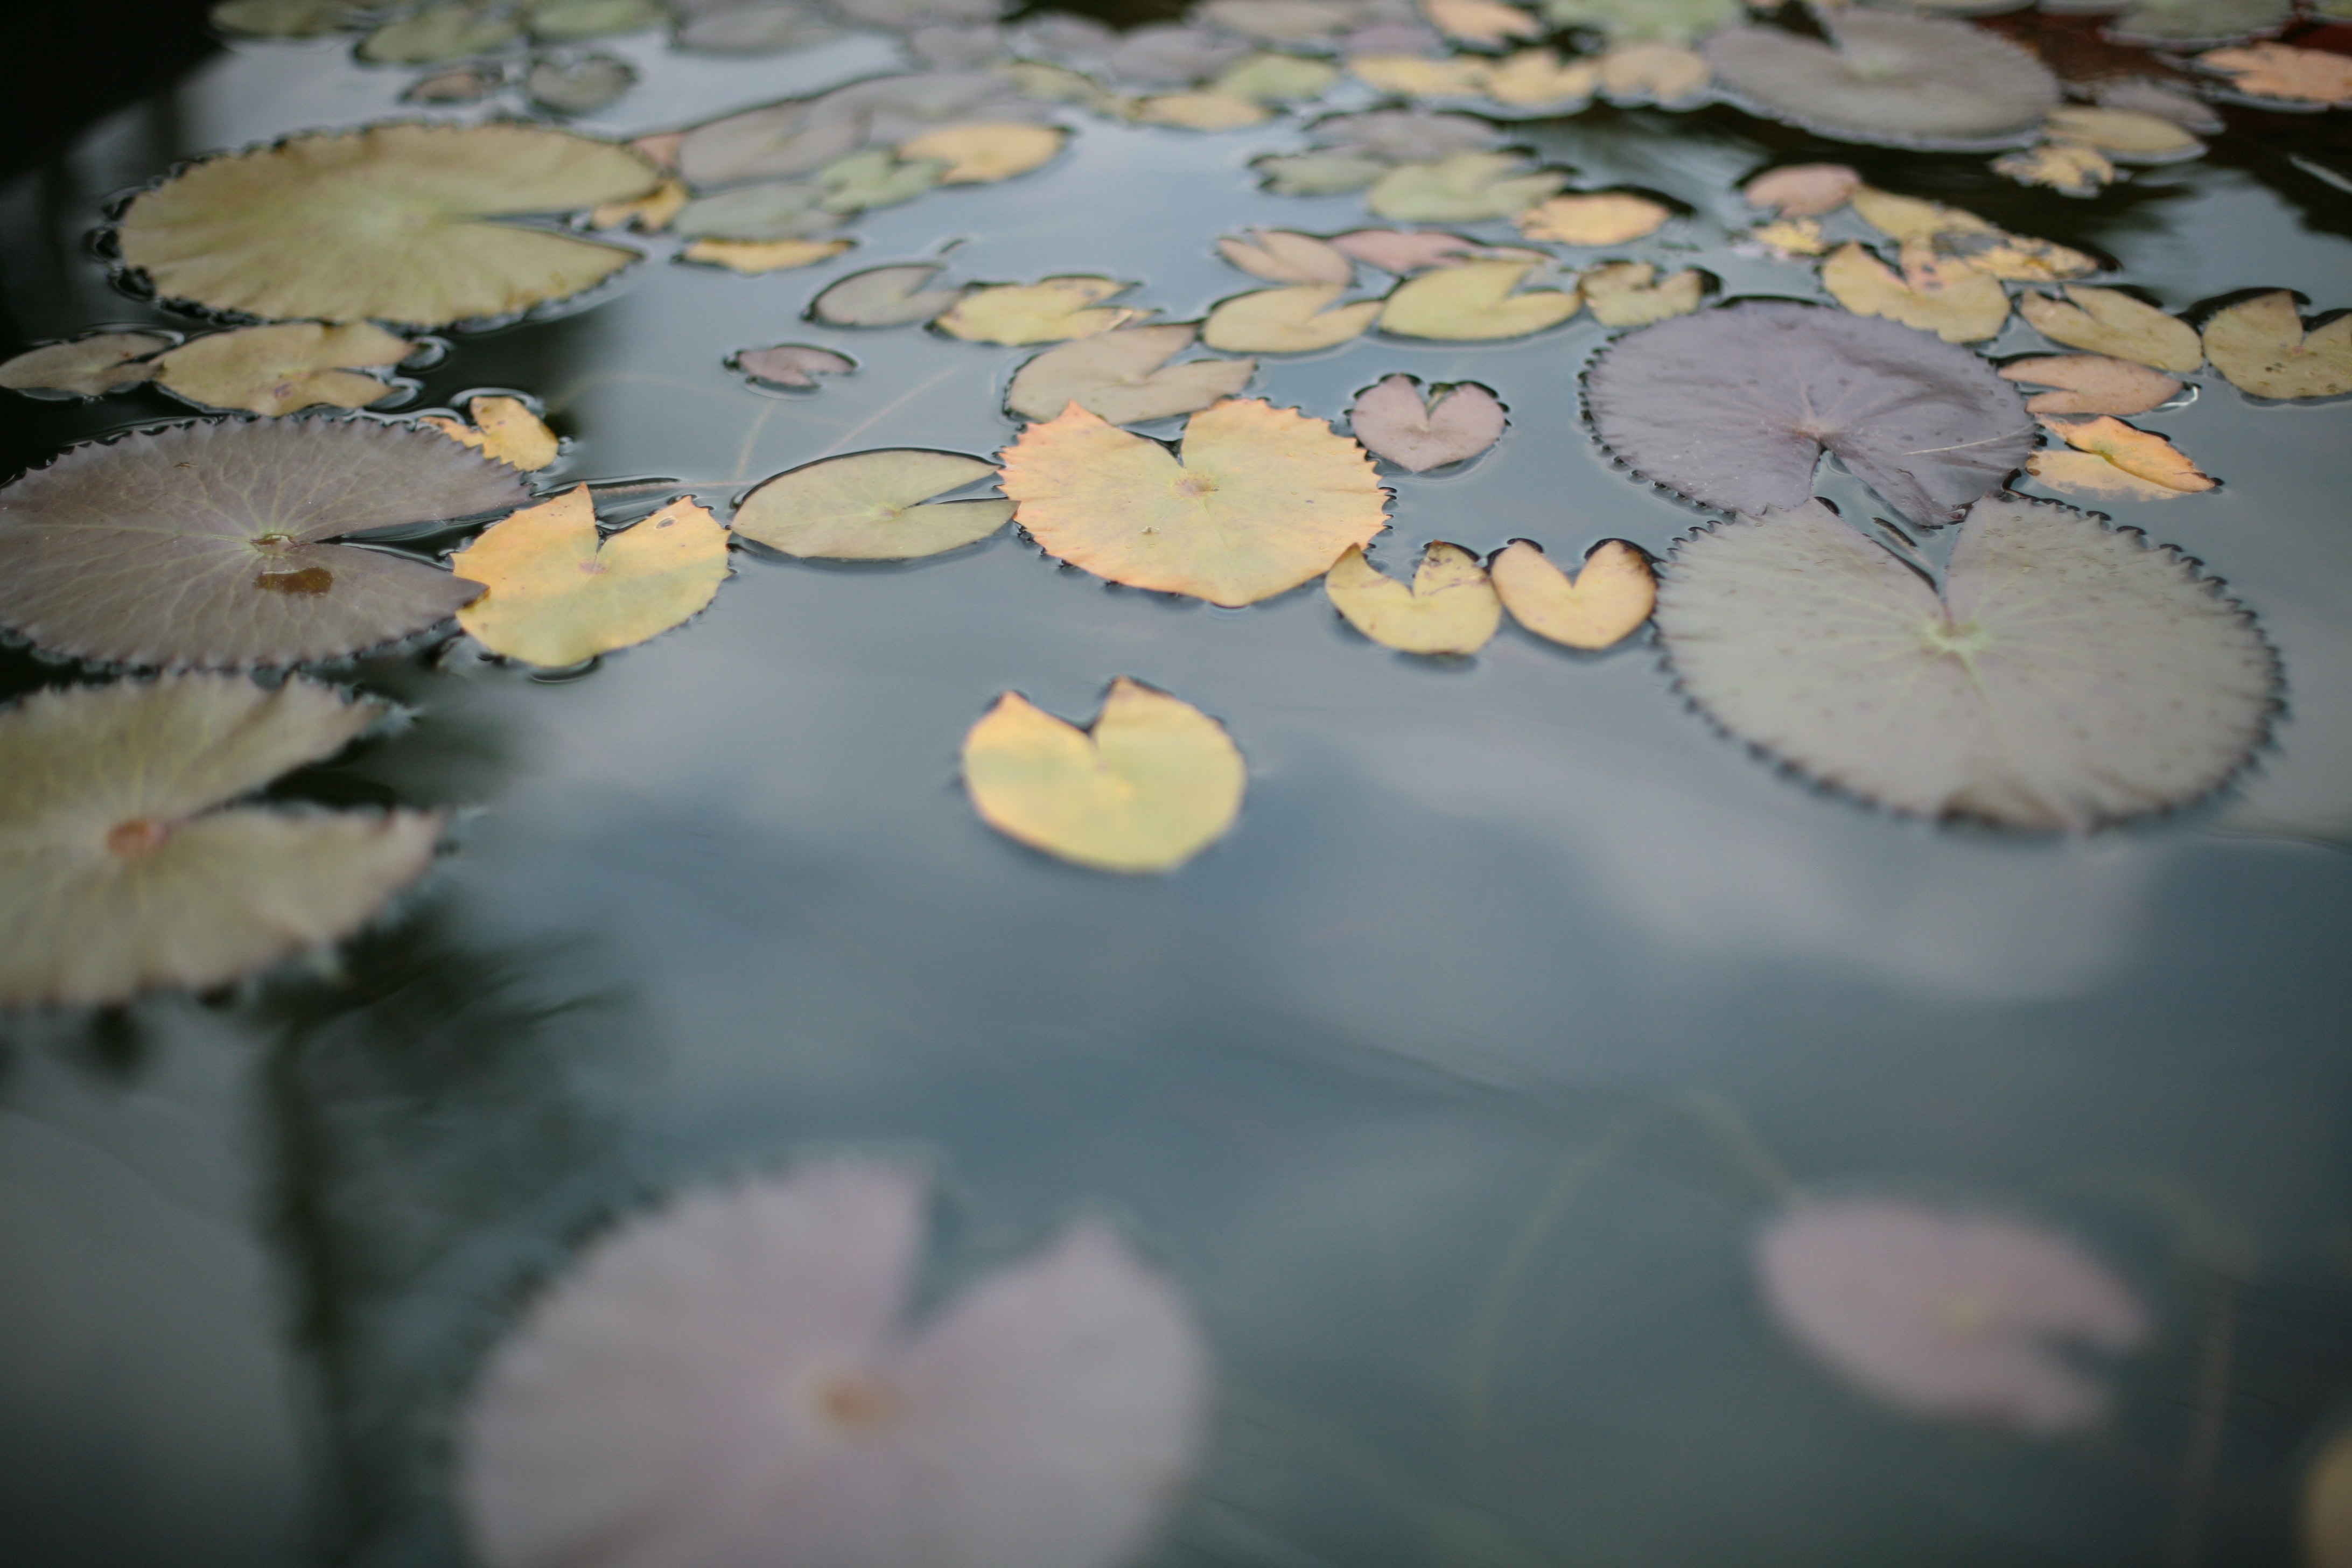

In [95]:
# should not be frog, it's a quilt
print(img_contains_frog(process_img_path('/content/frog_images/mche-lee-j-P8z4EOgyQ-unsplash.jpg')))
Image(filename='/content/frog_images/mche-lee-j-P8z4EOgyQ-unsplash.jpg', width=244)

[('n01641577', 'bullfrog', 0.9959907), ('n02655020', 'puffer', 0.002445589), ('n01667778', 'terrapin', 0.0010096631)]


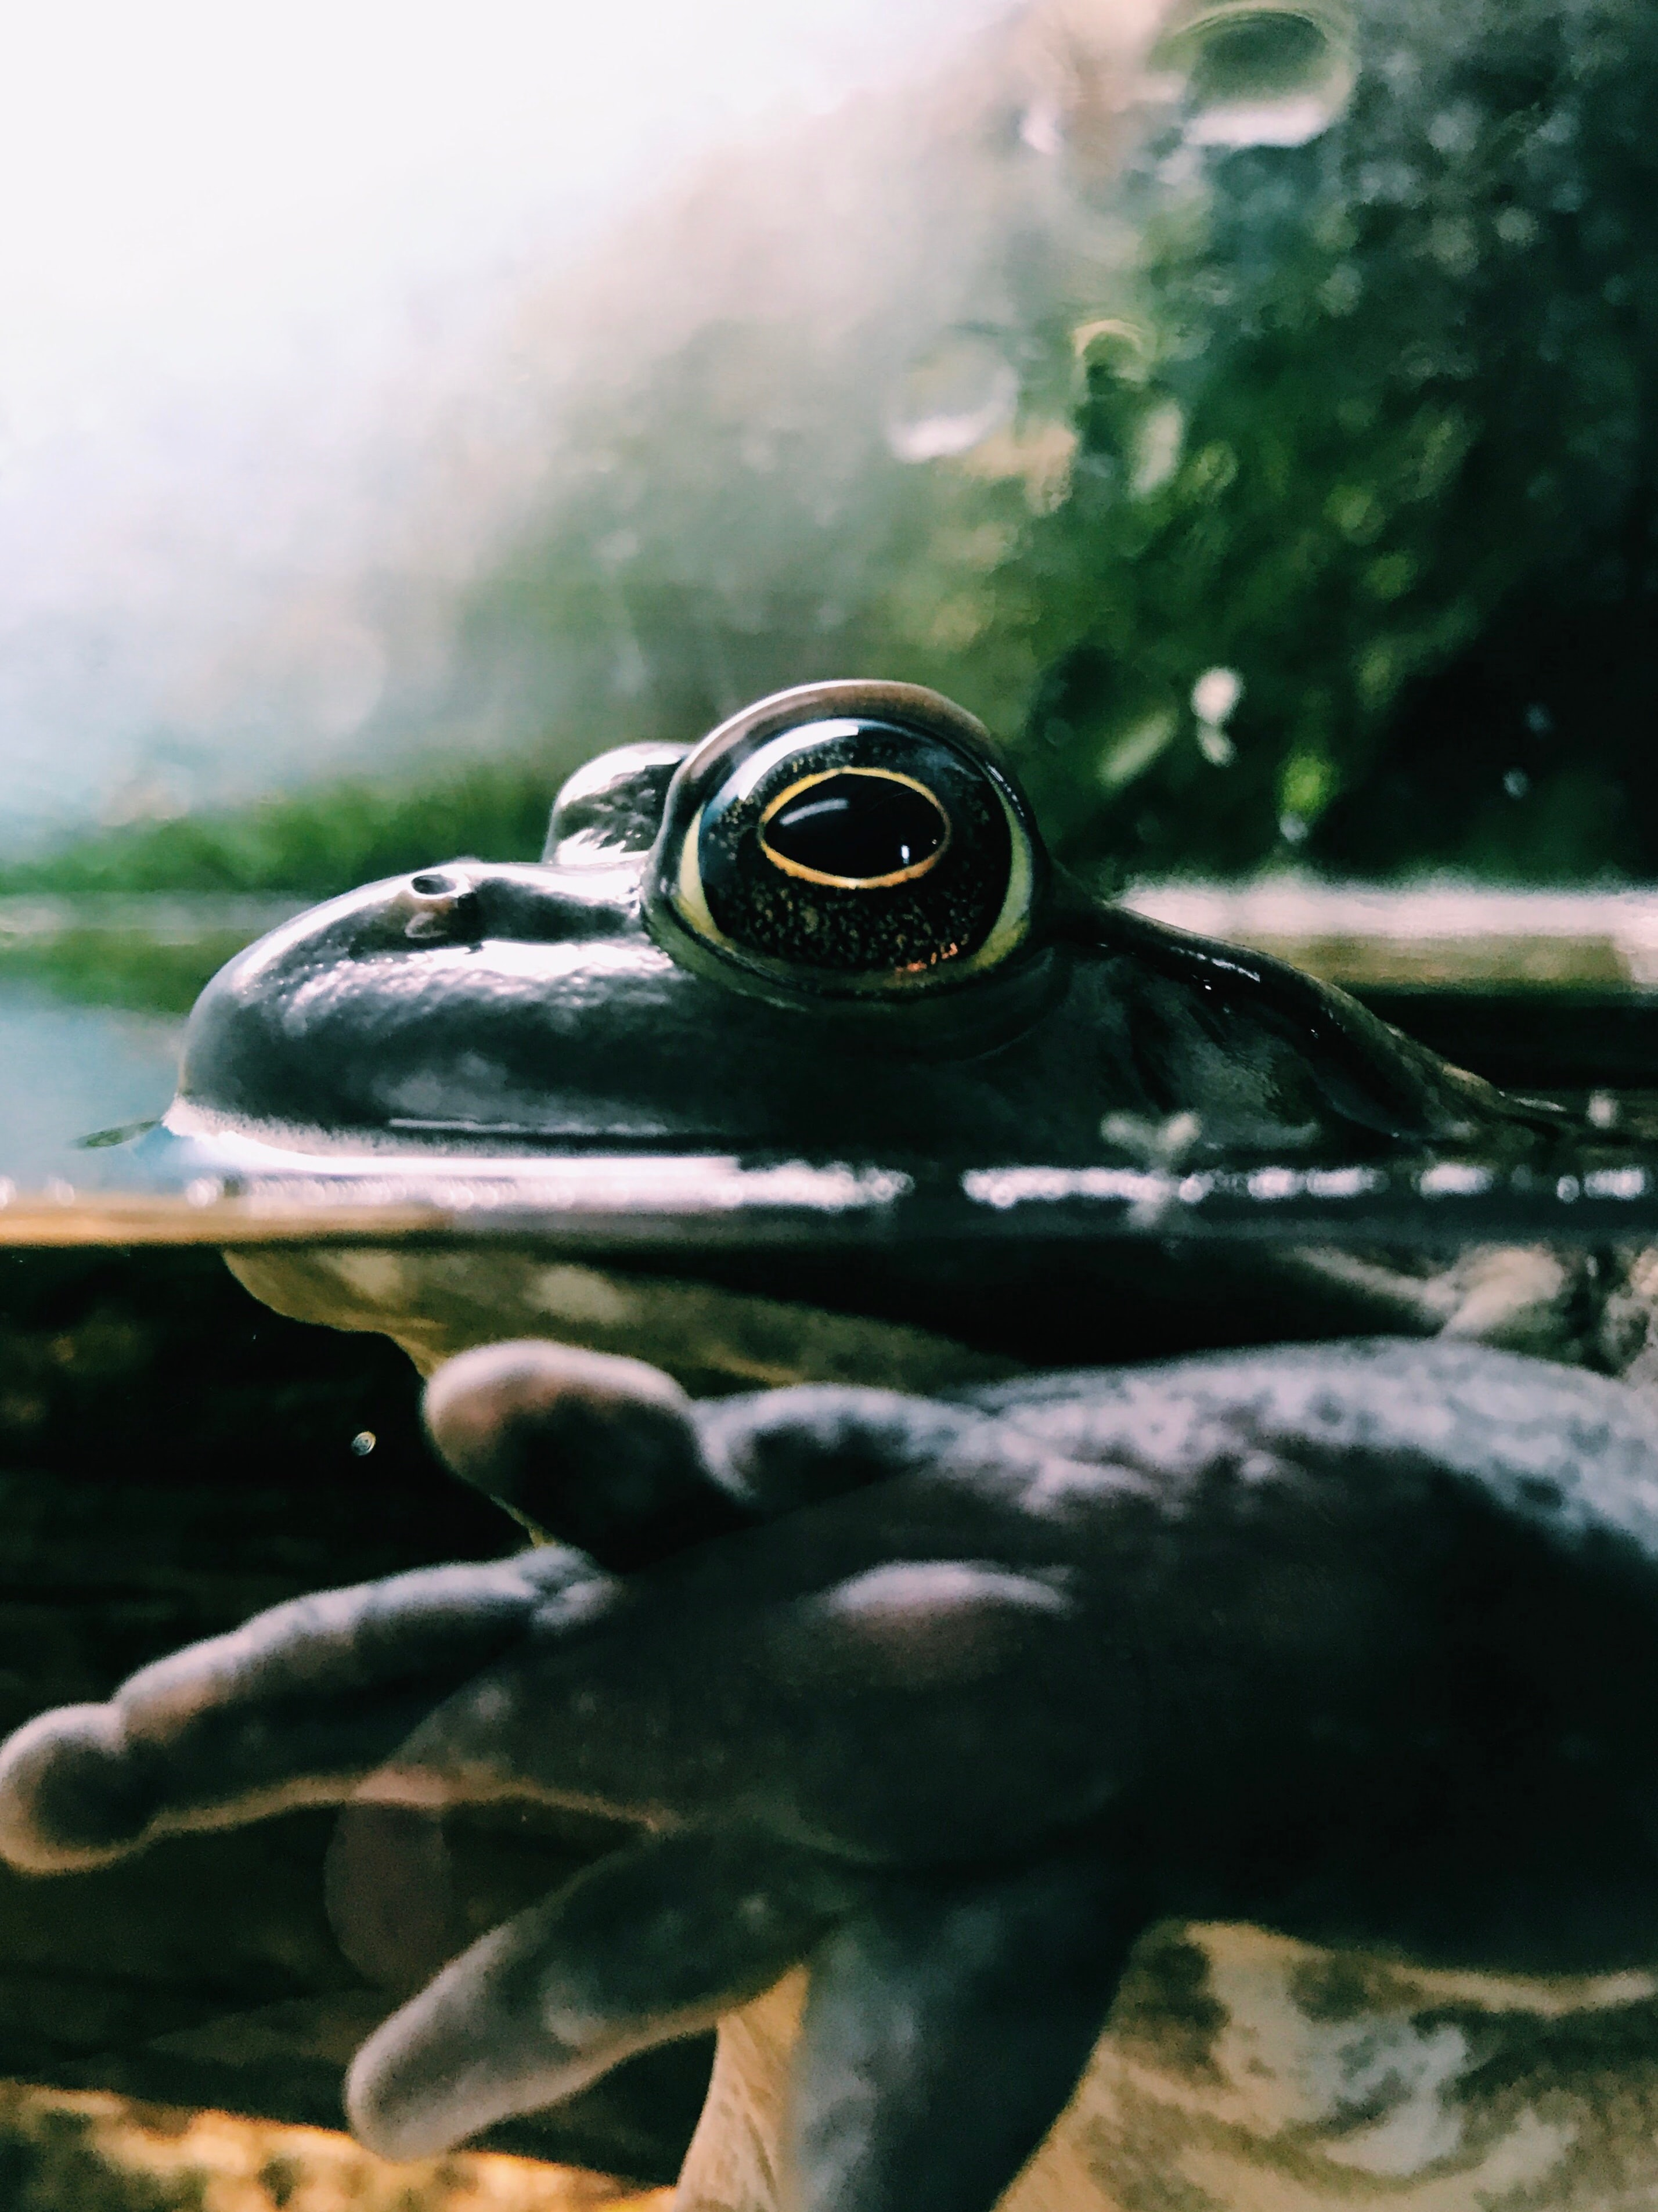

In [103]:
img_contains_frog(process_img_path('/content/frog_images/drew-brown-VBvoy5gofWg-unsplash.jpg'))
Image(filename='/content/frog_images/drew-brown-VBvoy5gofWg-unsplash.jpg', width=244)

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

An autoencoder is used to act as a representation for a set of data and is helpful for reducing deminesionaltiy. If we were trying to classify handwritten alphanumeric characters we could use an autoencoder for a generative model. 

Also, if we were trying to predict whether a user was a human or coputer we could use an encoder for CAPTCHA image prediction. If we train an encoder to predict the CAPTCHA then we know we can't use that image/test case. If the model with the autoencoder cannot accurately solve the CAPTCHA then we could use that image as a test for "humans". 


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

**- What do you consider your strongest area, as a Data Scientist?**

My strongest technical area as a Data Scientist is probalby in regards to doing data analysis and visualization. During my build weeks I've enjoyed finding data and analzying it so that conclusions can be drawn. My best non-technical skill as a data scientist is my ability to write which I've developed over the years. I'm able to confidently explain my thoughts and data in written terms which is a very valuable. 

**What area of Data Science would you most like to learn more about, and why?**

I would like to continue to get better at SQL, working with APIs, and learn how to develop alternative data sources that can be utilized. I think that these are the valuable aspects of data science which people tend to overlook becuase it isn't modeling or flashy. 

**Where do you think Data Science will be in 5 years?**

I think we generally overesitmate where technology will be in a couple of years and underestimate where it will be in 10 years. I think Data Science will continue to expand as data becomes more prevelant and valuable. I expect my personal field of cyrptocurrency/blockchain to utilize data driven decisions more over the next couple of years as the industry matures. 

We still won't have AI cars in 5 years, but we will have lots of more data points that will make it more possible.  

-**What are the threats posed by AI to our society?**

AI posses a lot of threats specifically in regards to mass unemployment. AI has already taken many blue collar jobs and will now come for the white collar jobs including accountants, lawyers, and other untouched professions. This will be the largest threat in my opinion. 

AI will also threaten society with mass surveilance but more importantly with algorithmic oppression. Bias and unidented consenquences that are programmed into algorithms that control our lives(Google Search, Amazon, finance APIs) will have an increased (yet unseen) prevelance in our lives. This will potentially threaten many people in unknown ways. 

**How do you think we can counteract those threats?**

It's impossible to counteract some threats. China will continue to oppress it's people and most countries will stand by and watch, as they have done with Hong Kong. I think finding a way to pay people for their data, either as a regulatory mechanism or straight up would be a powerful equalizer. A data check or tax similar to a carbon tax would be wonderful for pricing in the externalities that harm everyday citizens. 

Investing in research and AI policy will also be incredibly important as a preventative measure. 

Although, I keep coming back to the phrase jurrasic park phrase "life finds a way" and I think AI/tech finds a way as well. 

**Do you think achieving General Artifical Intelligence is ever possible?**

Depends on your definition. If we're talking about an AI with a concience that functions, feels, and thinks like a human, probably not in my lifetime. At some point in time it will probably occur or more likley, humans will use technology and integrate hardware into our bodies that will make use more cyborg than human. But that's a long way off and a problem I won't have to deal with in my lifetime. 


## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [23]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")